In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad  # Make sure to import anndata
import matplotlib.pyplot as pl
import seaborn as sns
import bbknn
import scvelo as scv
import anndata
import leidenalg
import loompy
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
from matplotlib.pyplot import rc_context
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import os
import random
import mellon

In [2]:
import os
import scanpy as sc

# Set working directory
os.chdir("P:/Tolulope/Manuscript/Yuan Analysis")
adata = sc.read_h5ad('combined data.h5ad')
adata

AnnData object with n_obs × n_vars = 45833 × 55389
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample'

In [3]:
adata.obs.groupby('Sample').count()

batch  doublet  n_genes  n_genes_by_counts  total_counts  \
Sample                                                                  
YSham_GFP     1741     1741     1741               1741          1741   
YSham_noGFP   6930     6930     6930               6930          6930   
YOV_GFP       3660     3660     3660               3660          3660   
YOV_noGFP     6783     6783     6783               6783          6783   
ASham_GFP     1281     1281     1281               1281          1281   
ASham_noGFP   9075     9075     9075               9075          9075   
AOV_GFP       6232     6232     6232               6232          6232   
AOV_noGFP    10131    10131    10131              10131         10131   

             total_counts_mt  pct_counts_mt  
Sample                                       
YSham_GFP               1741           1741  
YSham_noGFP             6930           6930  
YOV_GFP                 3660           3660  
YOV_noGFP               6783           6783  
ASham_GFP               1281           1281  
ASham_noGFP             9075           9075  
AOV_GFP                 6232           6232  
AOV_noGFP              10131          10131

In [4]:
sc.pp.filter_genes(adata, min_cells = 3)
adata

AnnData object with n_obs × n_vars = 45833 × 37912
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample'
    var: 'n_cells'

In [5]:
adata.layers['counts'] = adata.X.copy()

In [6]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

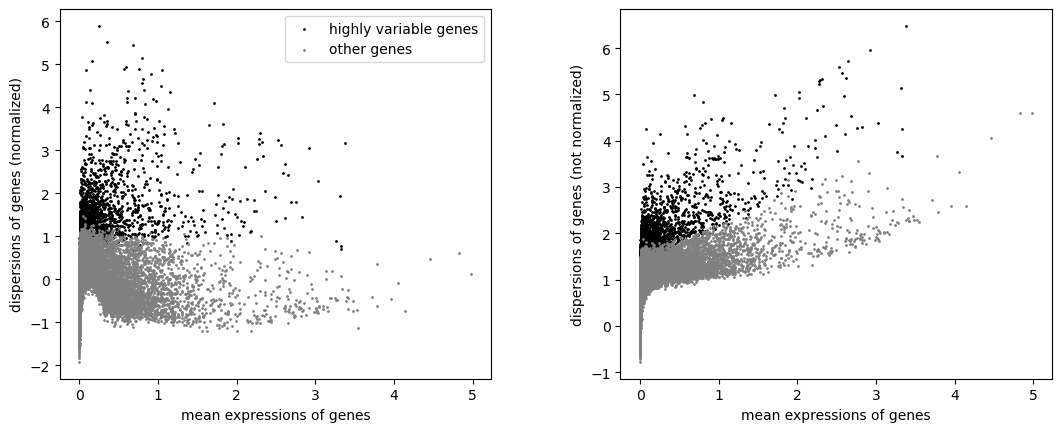

In [7]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, n_bins=20, batch_key='Sample', n_top_genes=2000)

sc.pl.highly_variable_genes(adata)#, save=f"{projID}_high_variable_{n3}.png")

In [8]:
adata.raw = adata

In [9]:
adata

AnnData object with n_obs × n_vars = 45833 × 37912
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [8]:
adata = adata[:, adata.var['highly_variable']].copy()
print(adata.shape)  


(45833, 2000)


In [9]:
sc.pp.scale(adata, max_value=10) 

In [10]:
sc.tl.pca(adata, svd_solver='arpack')

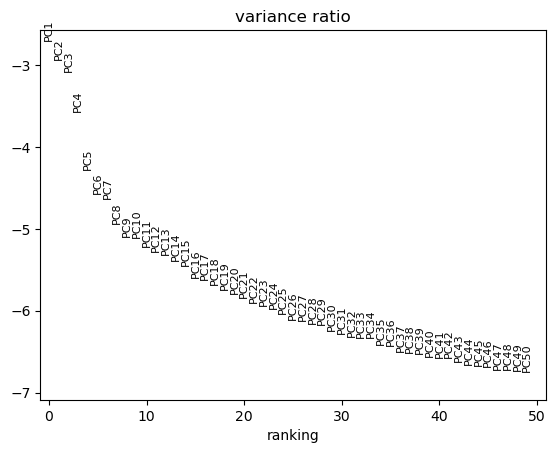

In [11]:
# Plot PCA variance ratio
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [12]:
adata

AnnData object with n_obs × n_vars = 45833 × 2000
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [12]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=50)
#BBKNN
bbknn.bbknn(adata, batch_key="Sample")
sc.tl.umap(adata)

In [13]:
sc.tl.leiden(adata, resolution = 0.7)

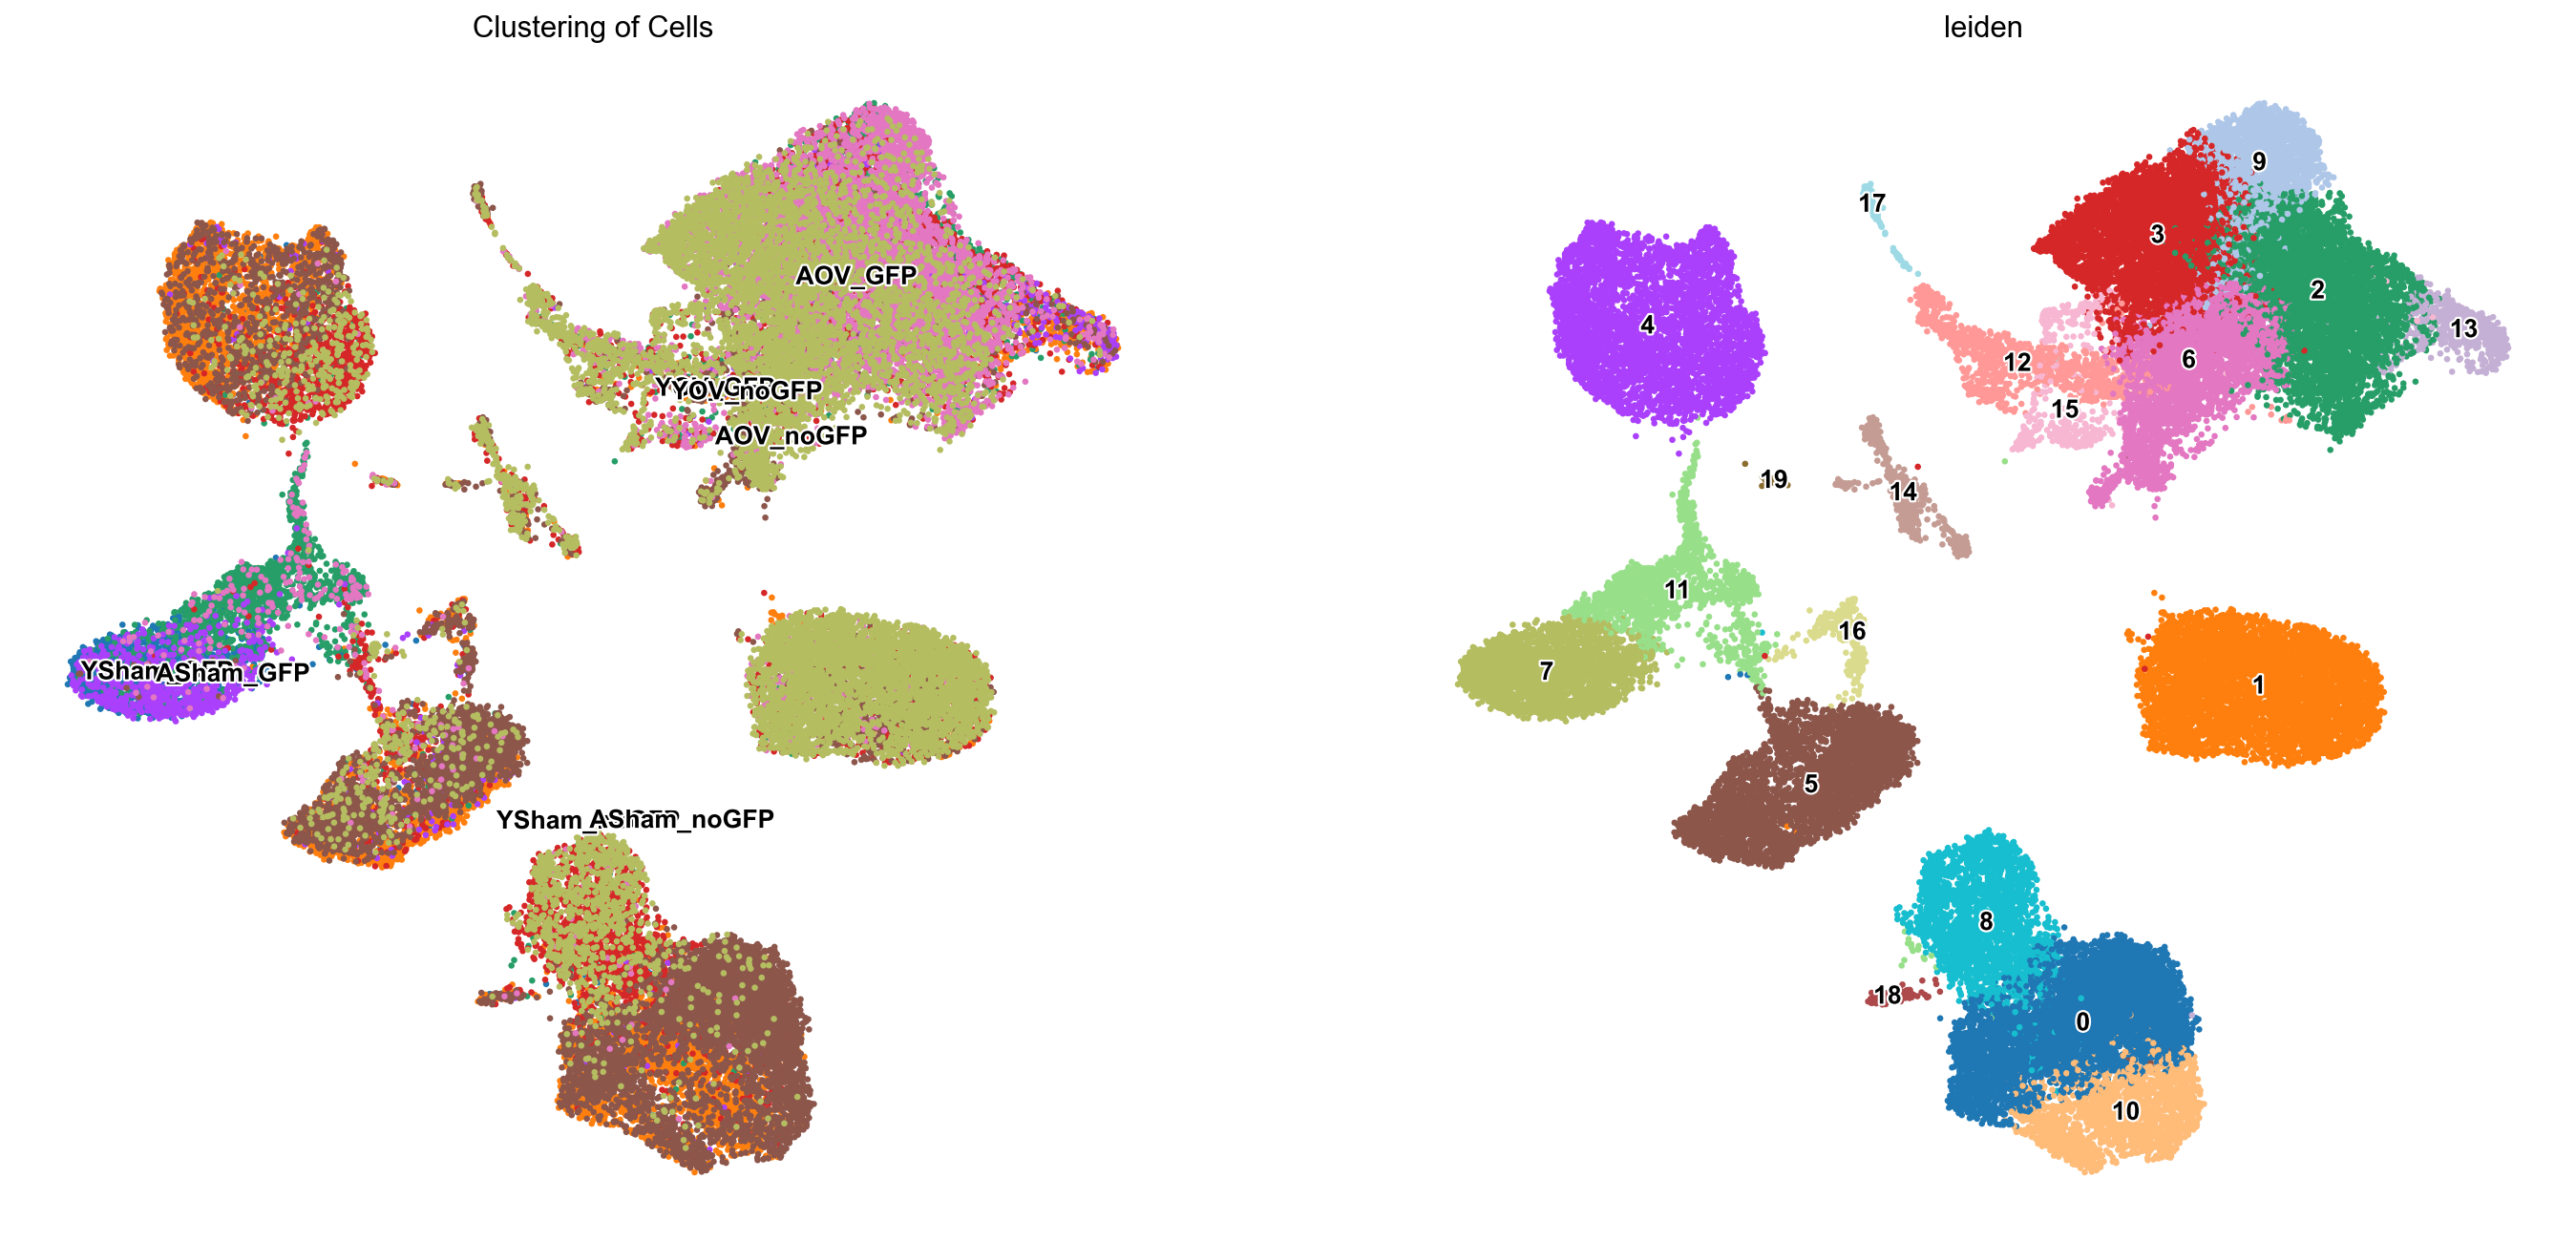

In [14]:
# Customize UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['Sample', 'leiden'], legend_loc='on data', legend_fontsize=12, legend_fontoutline=2, frameon=False, size=35, title='Clustering of Cells', save=f'umap_plot after integration sample and cell type{img_tag}.png')
pl.show()

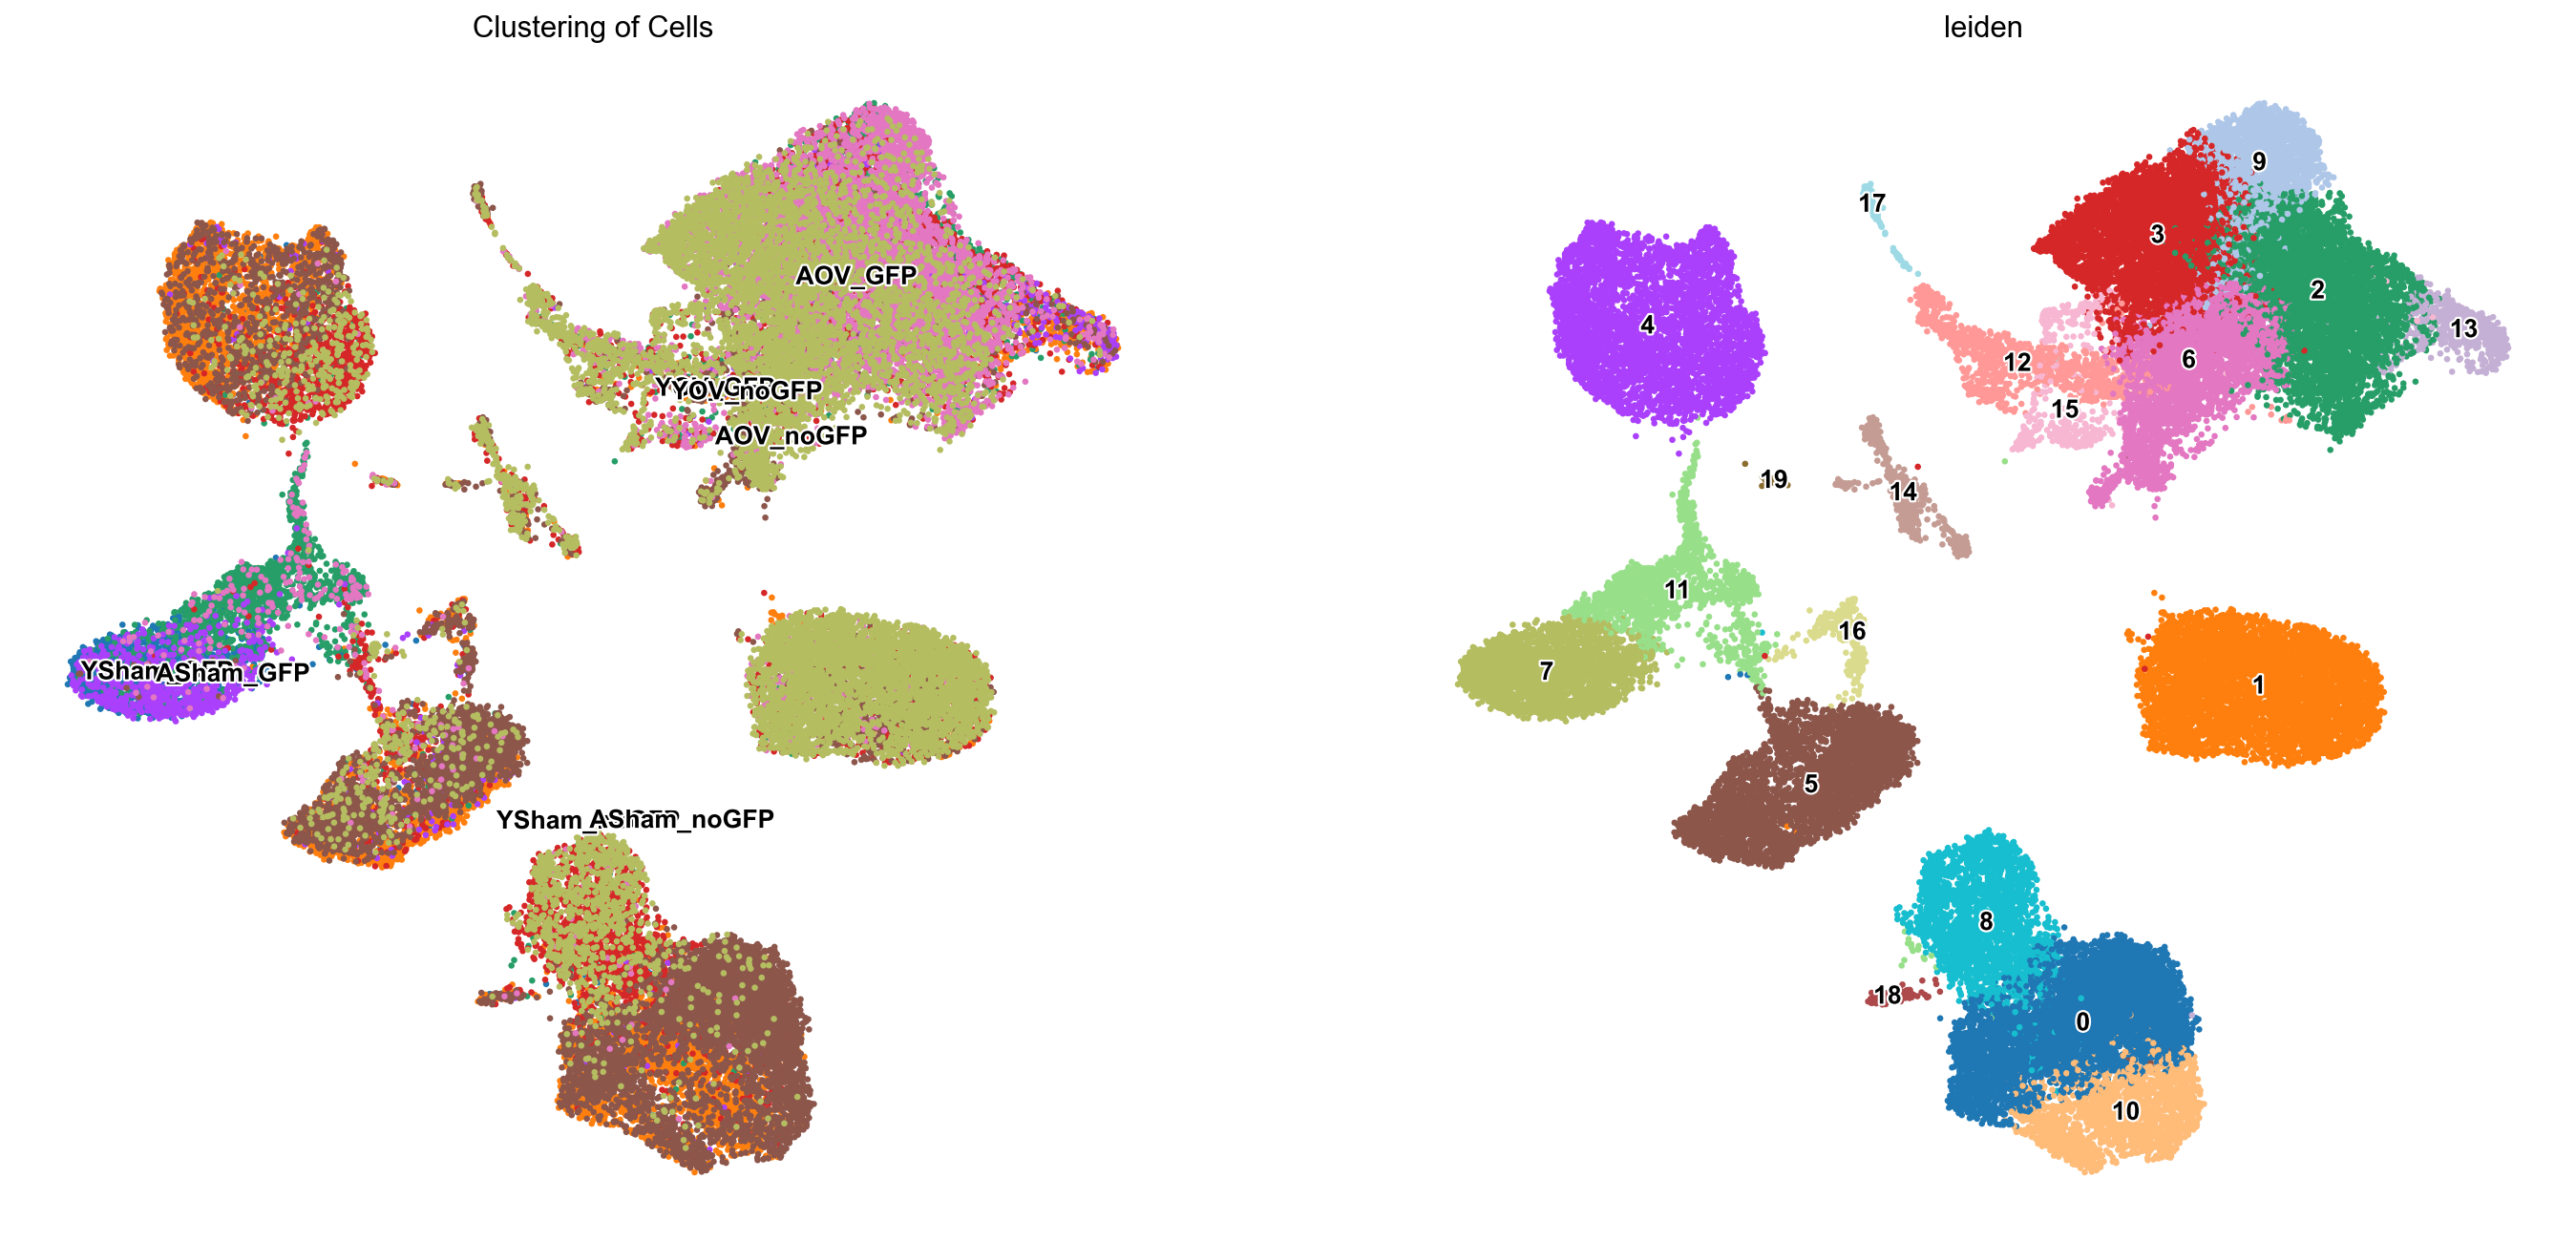

In [28]:
# Customize UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['Sample', 'leiden'], legend_loc='on data', legend_fontsize=12, legend_fontoutline=2, frameon=False, size=35, title='Clustering of Cells', save=f'umap_plot after integration sample and cell type{img_tag}.png')
pl.show()

In [29]:
adata.write('Harminted_data.h5ad')


In [30]:
adata_concat=adata.copy()

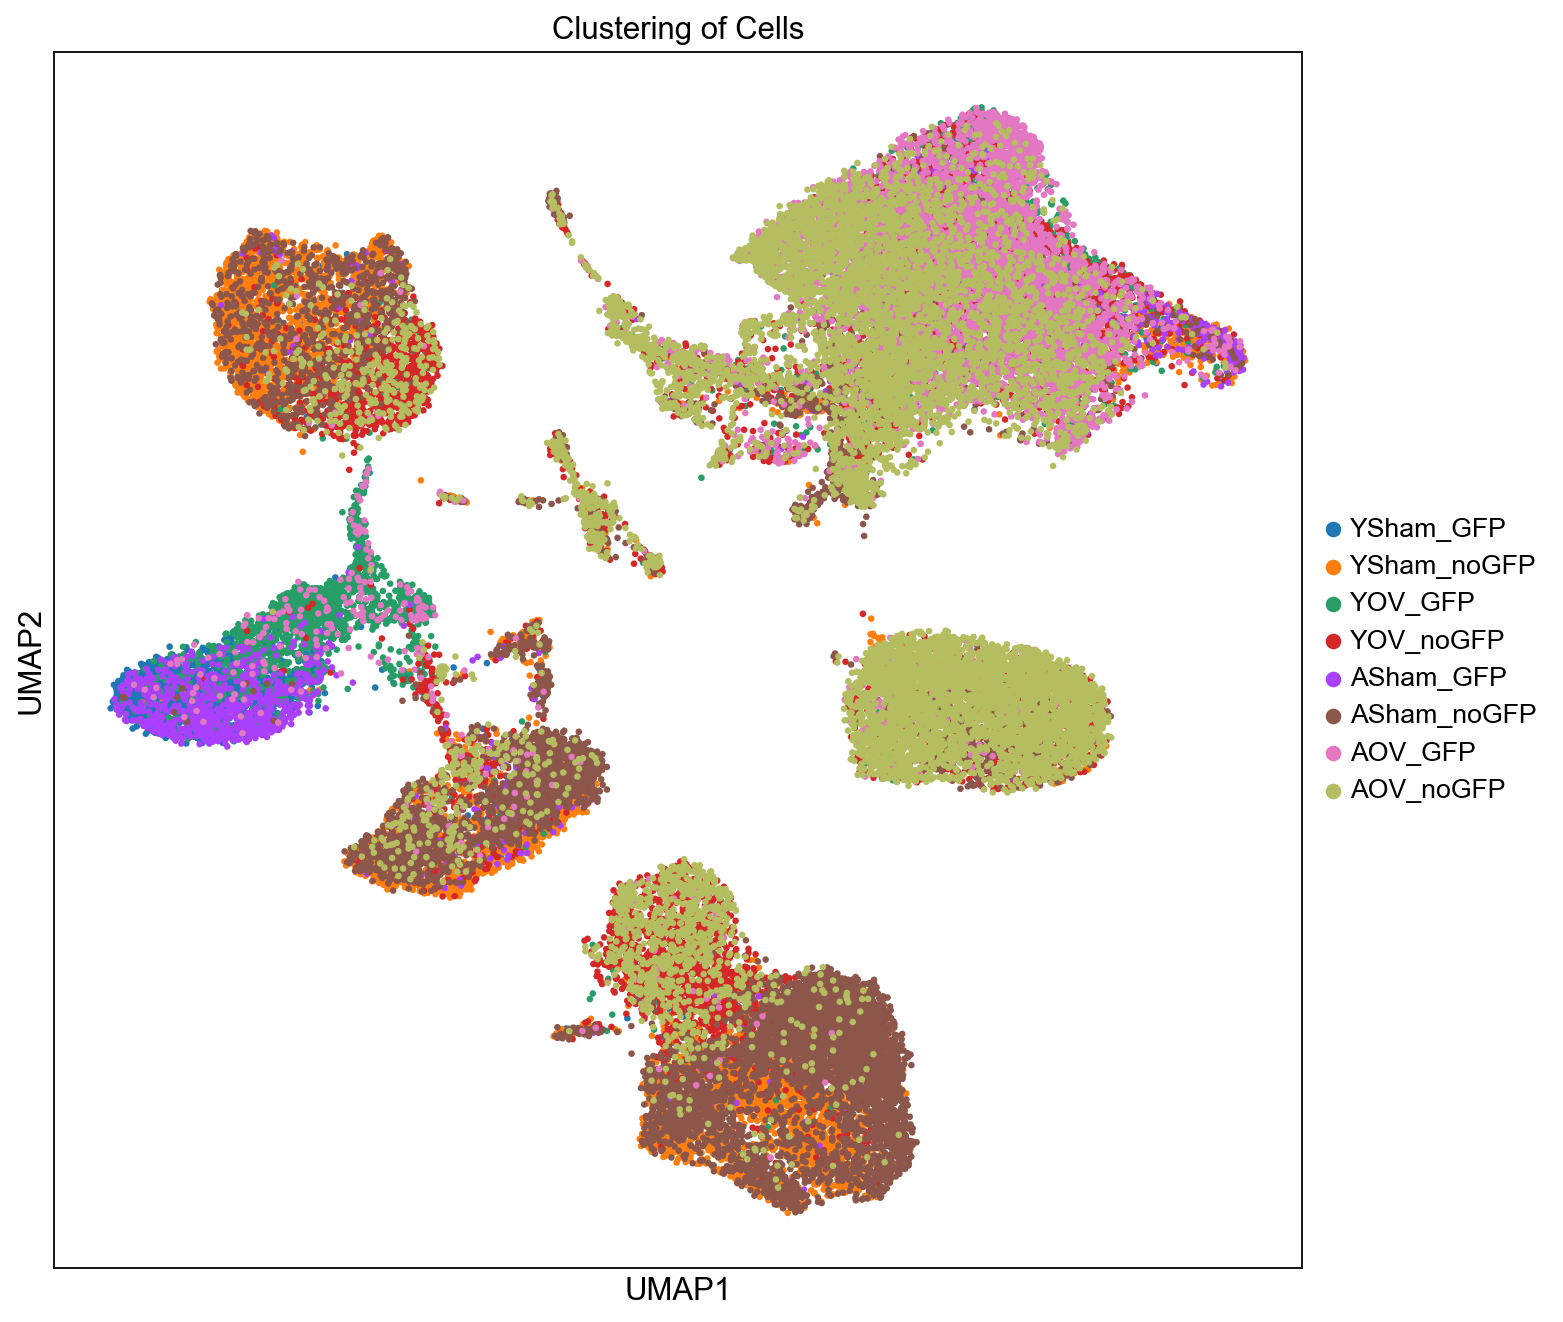

In [18]:

# Customize UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['Sample'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=35, title='Clustering of Cells', save=f'umap_plot after intesample1{img_tag}.png')
pl.show()

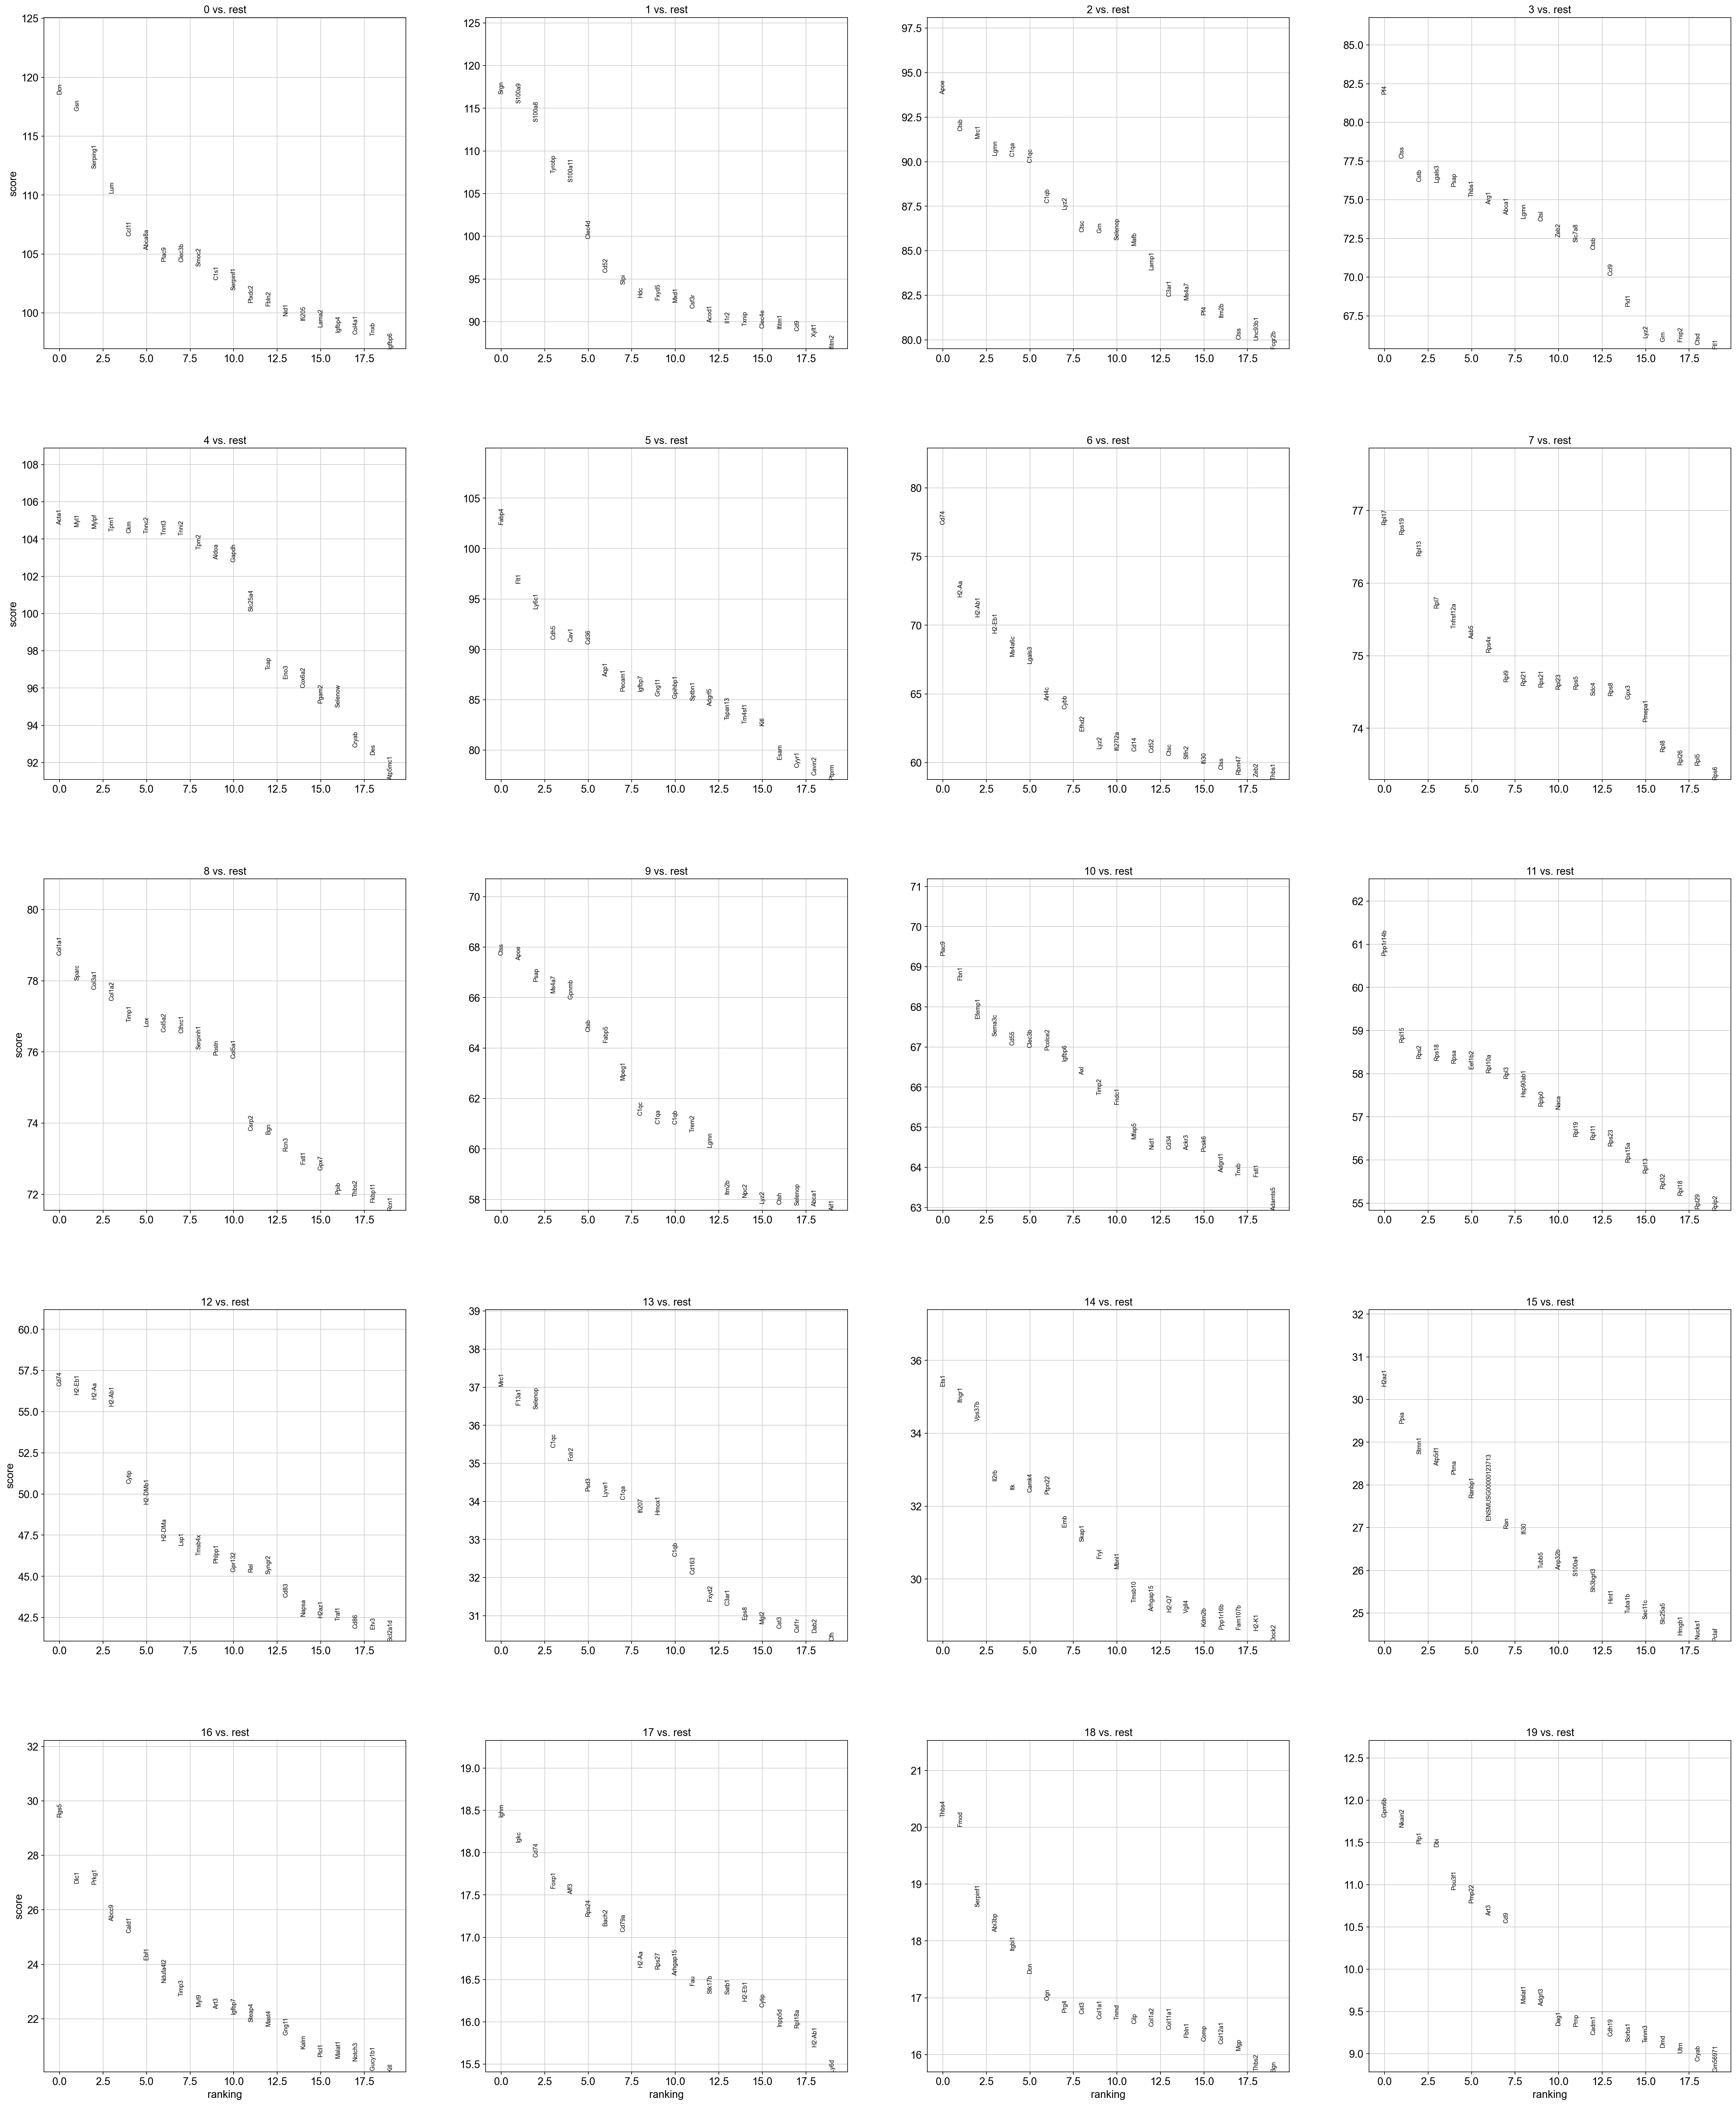

In [15]:
# Find marker genes for the refined clustering
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

# View top marker genes
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False, save=f'rankgenese{img_tag}.png')

In [16]:
result=adata.uns['rank_genes_groups']
groups=result ['names'].dtype.names
df=pd.DataFrame(
    {group + '_' + key[:15]: result [key] [group]
     for group in groups for key in ['names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges']})

In [17]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

group     names      scores  logfoldchanges     pvals  pvals_adj
0          0       Dcn  118.585190        7.556710  0.000000   0.000000
1          0       Gsn  117.156647        6.594182  0.000000   0.000000
2          0  Serping1  112.262993        5.248500  0.000000   0.000000
3          0       Lum  110.178291        5.837720  0.000000   0.000000
4          0     Ccl11  106.541931        6.214462  0.000000   0.000000
...      ...       ...         ...             ...       ...        ...
720746    19     Zfpm2    3.297441        2.425321  0.000976   0.047620
720747    19     Fbxo7    3.294055        2.801814  0.000988   0.048123
720748    19  Hsd17b11    3.292174        2.170344  0.000994   0.048383
720749    19      Mapt    3.290082        3.965463  0.001002   0.048682
720750    19   mt-Atp6    3.288506        0.704807  0.001007   0.048893

[52749 rows x 6 columns]

In [58]:
# Create a DataFrame from the 'markers' variable
markers_df = pd.DataFrame(markers)

# Define the full path including the file name and extension
csv_file_path = 'P:/Tolulope/Manuscript/Yuan Analysis/markers_output.csv'

# Save the DataFrame to a CSV file
markers_df.to_csv(csv_file_path, index=False)

print(f"Output saved to {csv_file_path}")

Output saved to P:/Tolulope/Manuscript/Yuan Analysis/markers_output.csv


In [18]:
markers[markers.names =='Arg1']  

group names     scores  logfoldchanges         pvals     pvals_adj
77663      2  Arg1   9.383718        0.531160  6.368666e-21  7.973873e-20
113742     3  Arg1  74.723022        5.860057  0.000000e+00  0.000000e+00

In [19]:
cell_type = {
    "0": "Fibroadipogenic cells I",
    "1": "Neutrophils",
    "2": "M2-like macrophages II",
    "3": "Monocytes/Macrophages",
    "4": "Mature skeletal muscle",
    "5": "Endothelial cells",
    "6": "Residence Macrophages/APC",
    "7": "MuSCs",
    "8": "Myofibroblasts",
    "9": "Lipid-Laden Macrophages",
    "10": "Fibroadipogenic cells II",
    "11": "Fusion-Competent Myoblasts",
    "12": "Dendritic cells",
    "13": "M2-like macrophages I",
    "14": "T cells/NKCs",
    "15": "Proliferation",
    "16": "Pericytes",  
    "17":  "Bcells",
    "18": "Tenocytes",
    "19": "Schwann cells",
     
        
}
# Now map the 'leiden_R' column to 'cell type'
adata.obs['cell type'] = adata.obs['leiden'].map(cell_type)


In [ ]:
cell_type = {
    "0": "Neutrophils",
    "1": "Lipid-Laden Macrophages",
    "2": "Fibroadipogenic cells I",
    "3": "Mature skeletal muscle",
    "4": "Residence Macrophages/APC",
    "5": "M2-like macrophages",
    "6": "MuSCs",
    "7": "Endothelial cells I",
    "8": "Endothelial cells II",
    "9": "Proliferation",
    "10": "Fibroadipogenic cells I", 
    "11": "Monocytes/Macrophages", "Fusion-Competent Myoblasts"Mymx
    "12": "Dendritic cells",
    "13": "T cells/NKCs",
    "14": "Interferons",
    "15": "Pericytes", 
    "16":  "Bcells",
    "17": "Tenocyte",
    "18": "Schwann cells",
    "19": "Schwann cells",
     Mymx
        
}
# Now map the 'leiden_R' column to 'cell type'
adata.obs['cell type'] = adata.obs['leiden'].map(cell_type)


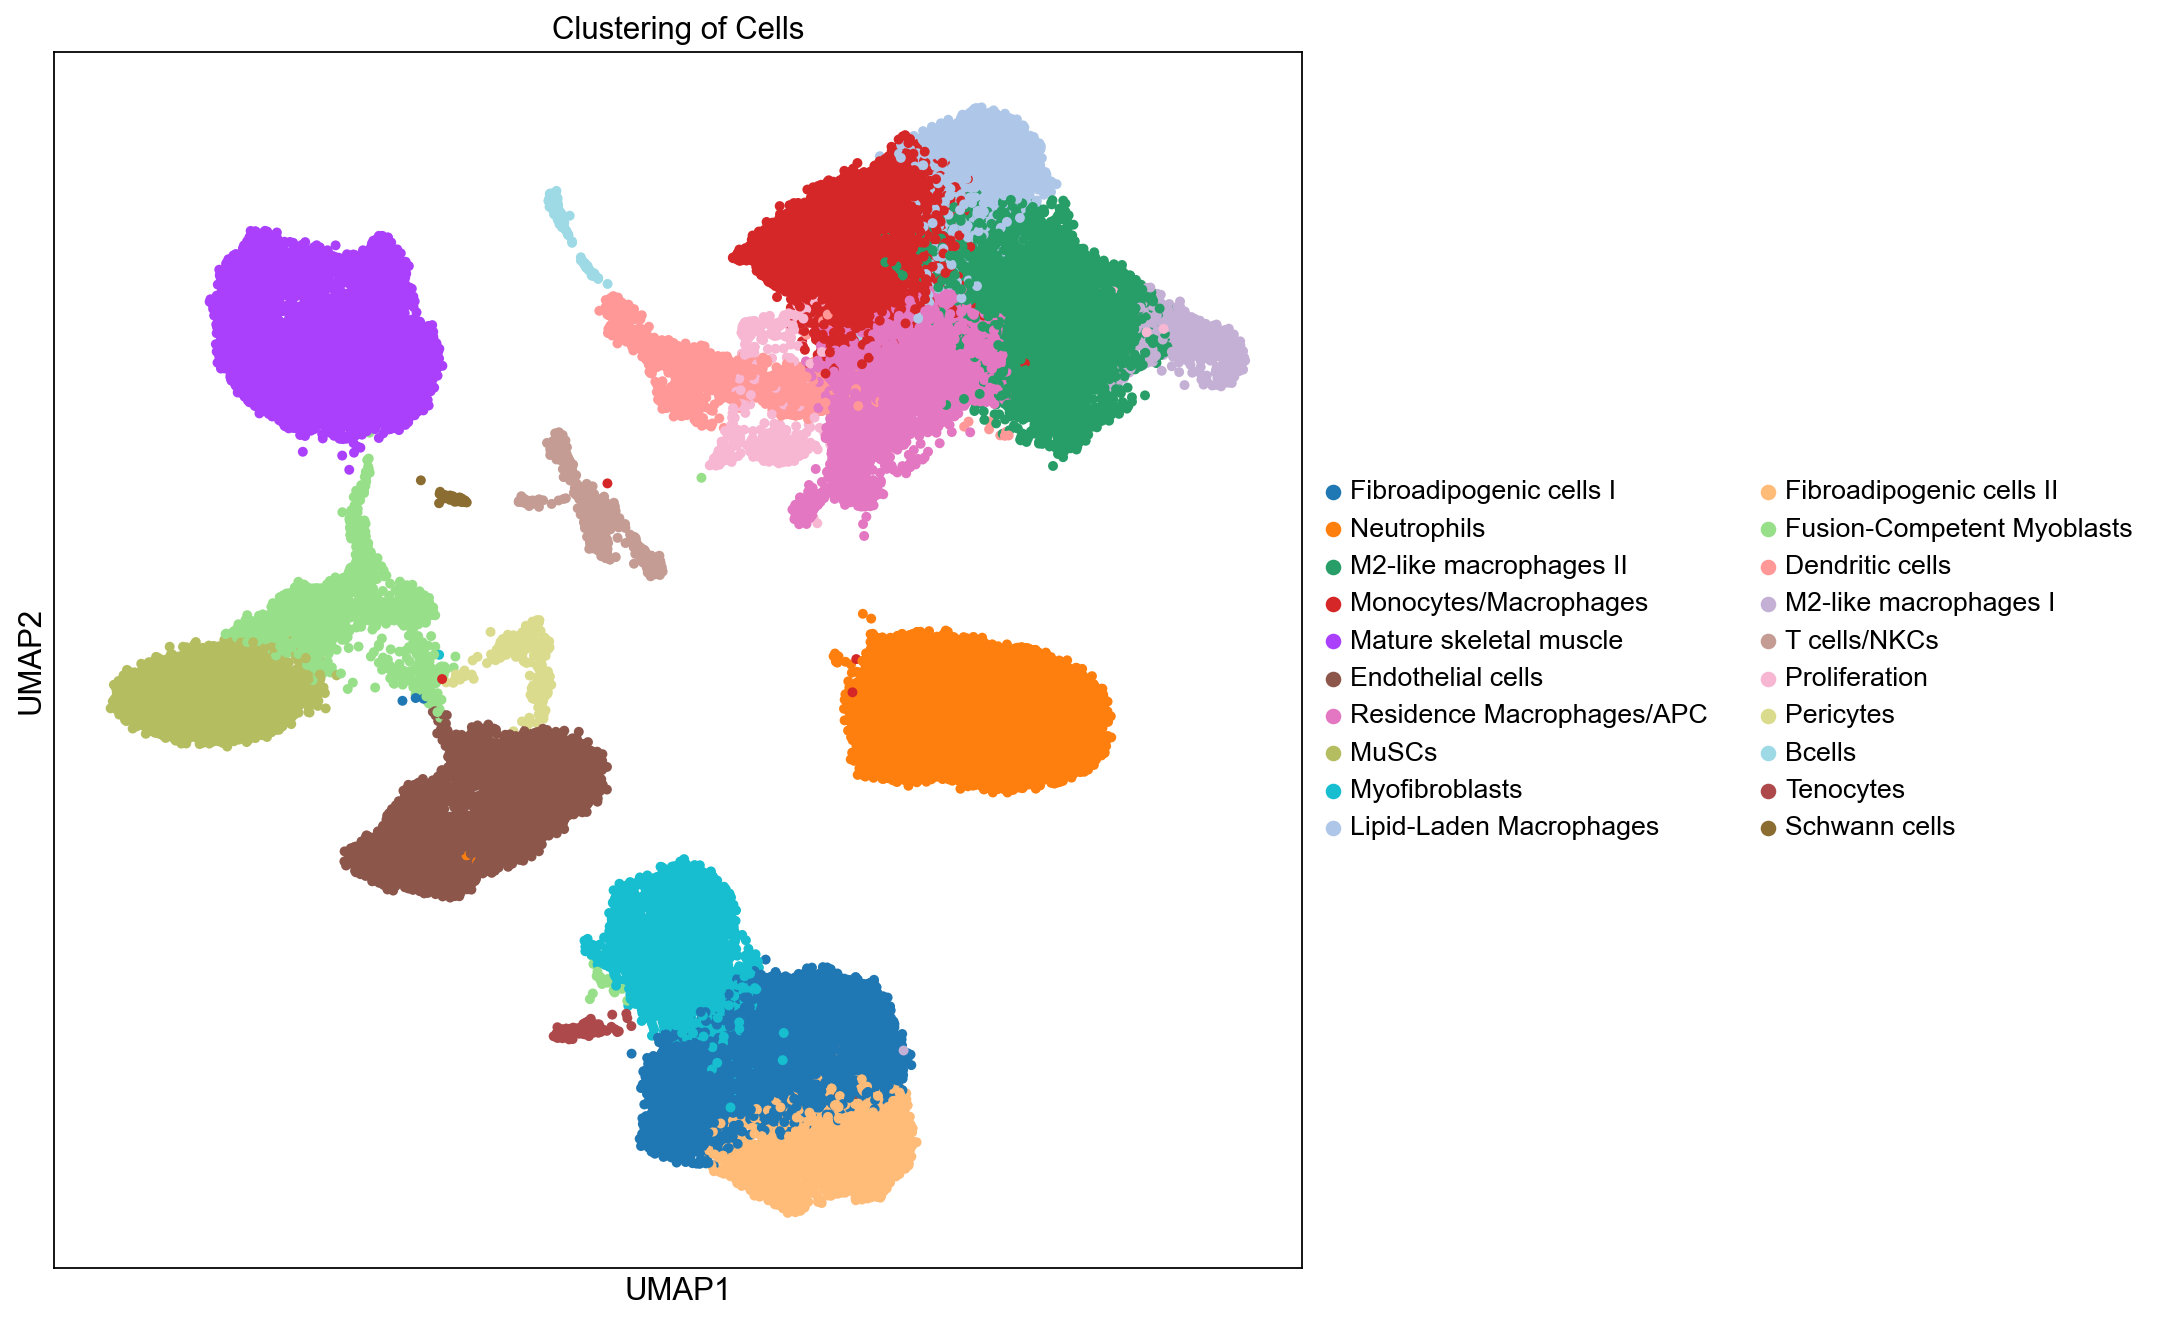

In [20]:
#UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['cell type'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=80, title='Clustering of Cells', save=f'umap_plot{img_tag}.png')
pl.show()

In [23]:
adata.write_h5ad('integrated celltype original2bbknn.h5ad')

In [21]:
# Define the mapping function
def map_condition(x):
    if 'YSham_GFP' in x:
        return 'YSham-GFP'
    elif 'YSham_noGFP' in x:
        return 'YSham-noGFP'
    elif 'YOV_GFP' in x:
        return 'YOV-GFP'
    elif 'YOV_noGFP' in x:
        return 'YOV-noGFP'
    elif 'ASham_GFP' in x:
        return 'ASham-GFP'
    elif 'ASham_noGFP' in x:
        return 'ASham-noGFP'
    elif 'AOV_GFP' in x:
        return 'AOV-GFP'
    else:
        return 'AOV-noGFP'

# Apply mapping
adata.obs['condition'] = adata.obs.batch.map(map_condition)


<Figure size 1120x800 with 0 Axes>

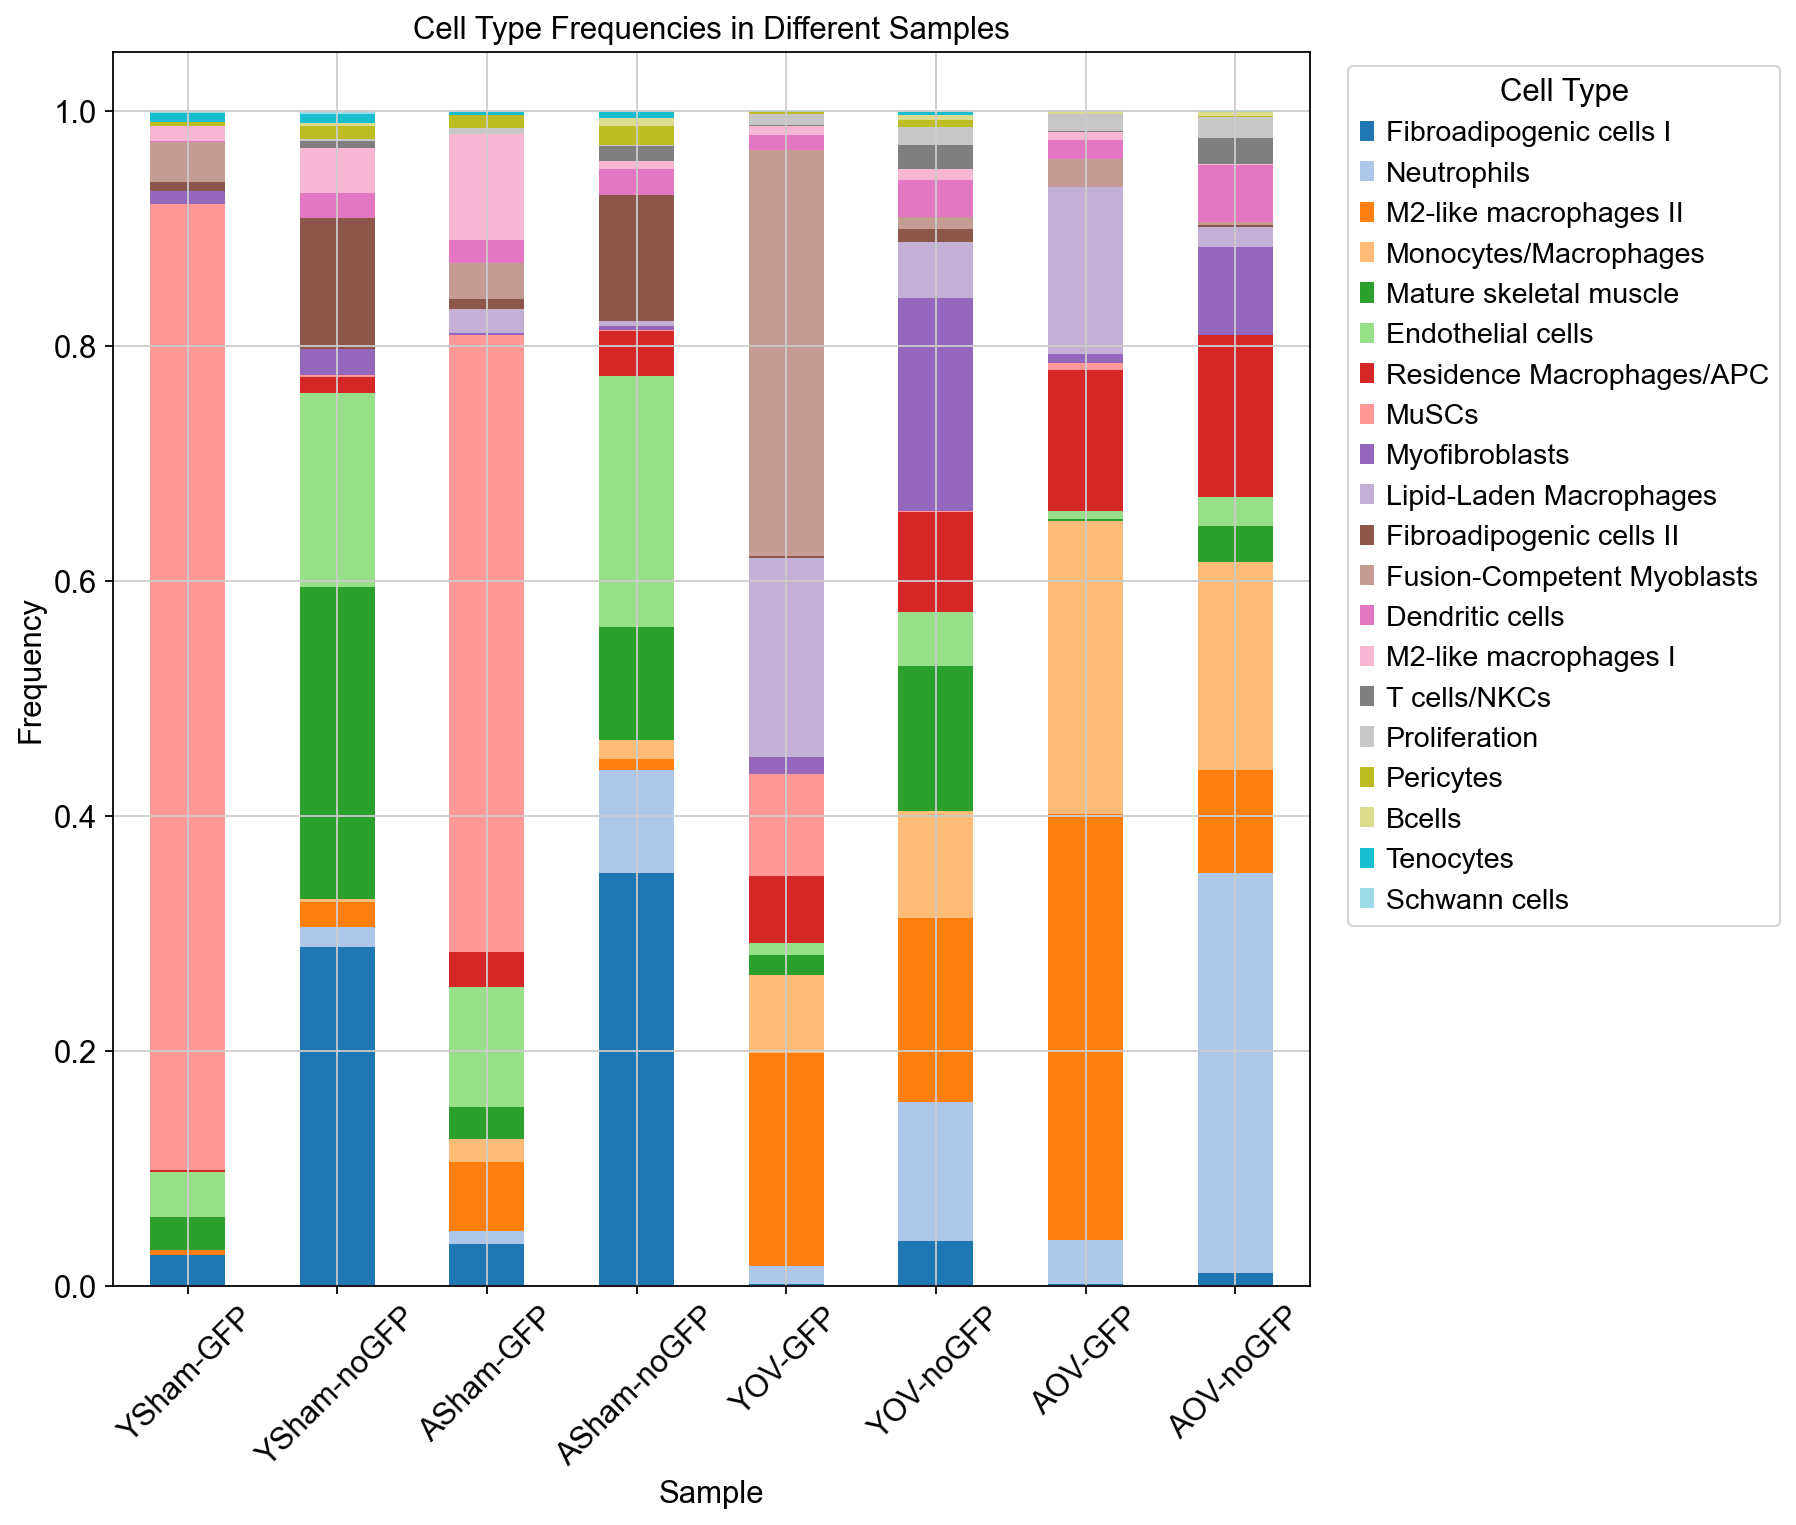

In [22]:
import matplotlib.pyplot as plt

# Grouping by condition and cell type to get cell type counts
cell_type_counts = adata.obs.groupby(['condition', 'cell type']).size().reset_index(name='count')

# Adding total cell counts for each condition
total_cells = adata.obs.groupby('condition').size().reset_index(name='total_cells')
total_cells_dict = dict(zip(total_cells['condition'], total_cells['total_cells']))
cell_type_counts['total_cells'] = cell_type_counts['condition'].map(total_cells_dict)

# Ensure the total_cells column is numeric
cell_type_counts['total_cells'] = cell_type_counts['total_cells'].astype(int)

# Calculating the frequency of each cell type in each condition
cell_type_counts['frequency'] = cell_type_counts['count'] / cell_type_counts['total_cells']

# Set the figure size larger to accommodate longer labels
plt.figure(figsize=(14, 10))

# Define the order of samples in the plot
sample_order = ['YSham-GFP', 'YSham-noGFP',  'ASham-GFP', 'ASham-noGFP','YOV-GFP', 'YOV-noGFP', 'AOV-GFP', 'AOV-noGFP']

# Ensure 'condition' column is categorized to maintain the specified order
cell_type_counts['condition'] = pd.Categorical(cell_type_counts['condition'], categories=sample_order, ordered=True)

# Pivot the DataFrame for a stacked bar plot
stacked_data = cell_type_counts.pivot_table(index='condition', columns='cell type', values='frequency', fill_value=0)

# Create a stacked bar plot with distinct colors for each cell type
ax = stacked_data.plot(kind='bar', stacked=True, colormap='tab20')

# Set plot properties
plt.xlabel('Sample')
plt.ylabel('Frequency')
plt.title('Cell Type Frequencies in Different Samples')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to make room for the legend

# Rotate x-axis labels
plt.xticks(rotation=45)

# Move the legend to the right side
plt.legend(title='Cell Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig('bar1_plotbbknn.png')
# Show the plot
plt.show()


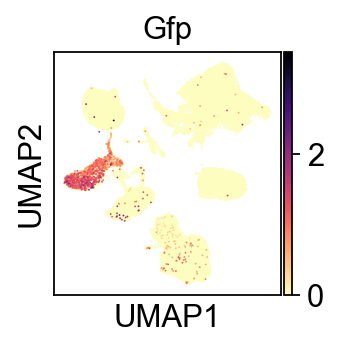

In [31]:
# Set figure size
pl.rcParams['figure.figsize'] = 2, 2

# Create the UMAP plot and save it
sc.pl.umap(adata_concat, color='Gfp', color_map='magma_r', save=f"umap_Gfp_{img_tag}.png")

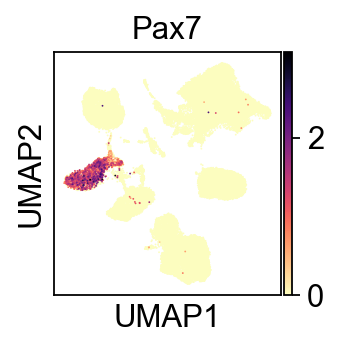

In [32]:
# Set figure size
pl.rcParams['figure.figsize'] = 2, 2

# Create the UMAP plot and save it
sc.pl.umap(adata_concat, color='Pax7', color_map='magma_r', save=f"umap_Pax7_{img_tag}.png")

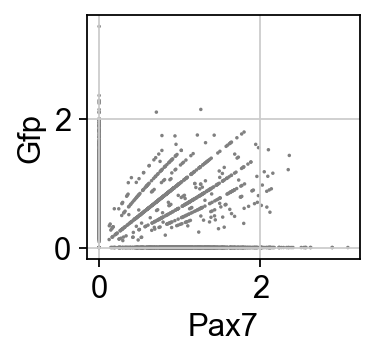

In [33]:
# Set figure size
pl.rcParams['figure.figsize'] = 3, 2

# Scatter plot of Pax7 vs Gfp and save it
sc.pl.scatter(adata_concat, x="Pax7", y="Gfp", size=10, save=f"umap_correlation_{img_tag}.png")


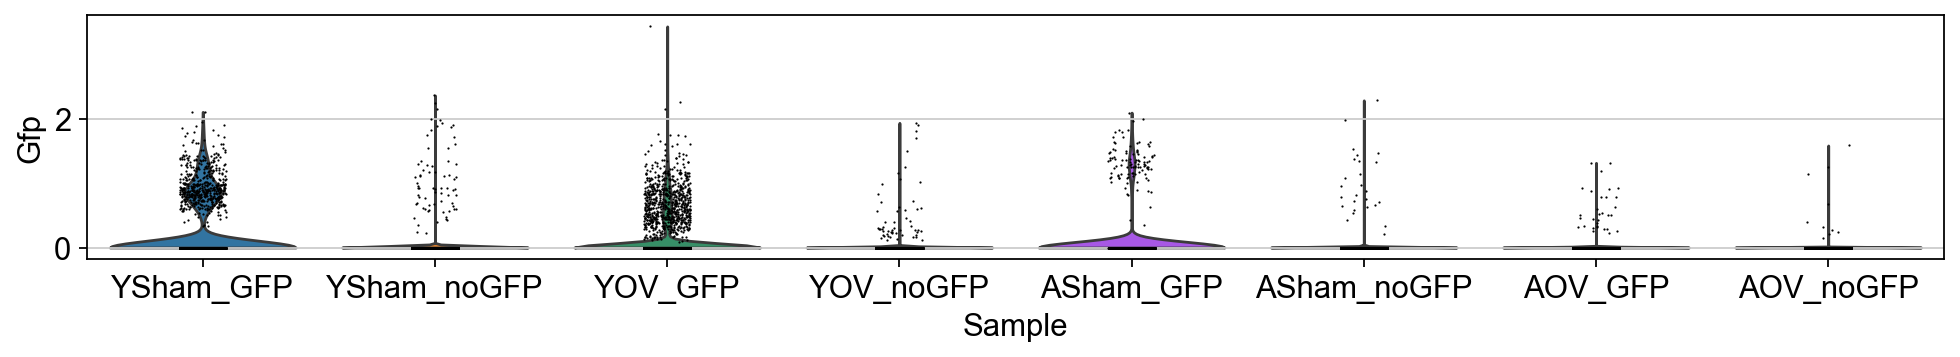

In [34]:
# Set figure size
pl.rcParams['figure.figsize'] = 12, 2

sc.pl.violin(adata, "Gfp", "Sample", save=f"umap_correlation_{img_tag}.png")

In [49]:

# Set working directory
os.chdir("P:/Tolulope/Manuscript/Yuan Analysis")
adata = sc.read("Harminted_data.h5ad")

In [40]:
adata_concat=adata.copy()

In [35]:
# Now, check the raw attribute of the concatenated data
print(adata_concat.raw)  # Print the raw object
print(adata_concat.raw.var.shape)  # Print the shape of raw gene data


Raw AnnData with n_obs × n_vars = 45833 × 37912
    var: 'n_cells'
(37912, 1)


In [36]:
# Filtering cells where 'Gfp' and 'Pax7' have zero expression in raw data
ad_filtered = adata_concat[
    (adata_concat.raw[:, "Gfp"].X.toarray().flatten() == 0) &  # Filter cells where 'Gfp' expression is 0
    (adata_concat.raw[:, "Pax7"].X.toarray().flatten() == 0),  # Filter cells where 'Pax7' expression is 0
    :
].copy()

# Print the filtered object
print(ad_filtered)

AnnData object with n_obs × n_vars = 43257 × 2000
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample', 'leiden', 'cell type', 'condition'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'Sample_colors', 'leiden_colors', 'rank_genes_groups', 'cell type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'


In [42]:
ad_filtered = adata_concat[((adata_concat.raw[: , "Gfp"].X.toarray().flatten() ==0) & (adata_concat.raw[: , "Pax7"].X.toarray().flatten() ==0)), :].copy()
#ad_filtered = adata_concat[(adata_concat.raw[: , "Gfp"].X.toarray().flatten() ==0) , :].copy()
print(ad_filtered)

AnnData object with n_obs × n_vars = 43257 × 2000
    obs: 'batch', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Sample', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'Sample_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'


In [37]:
sc.tl.embedding_density(ad_filtered, groupby='Sample')

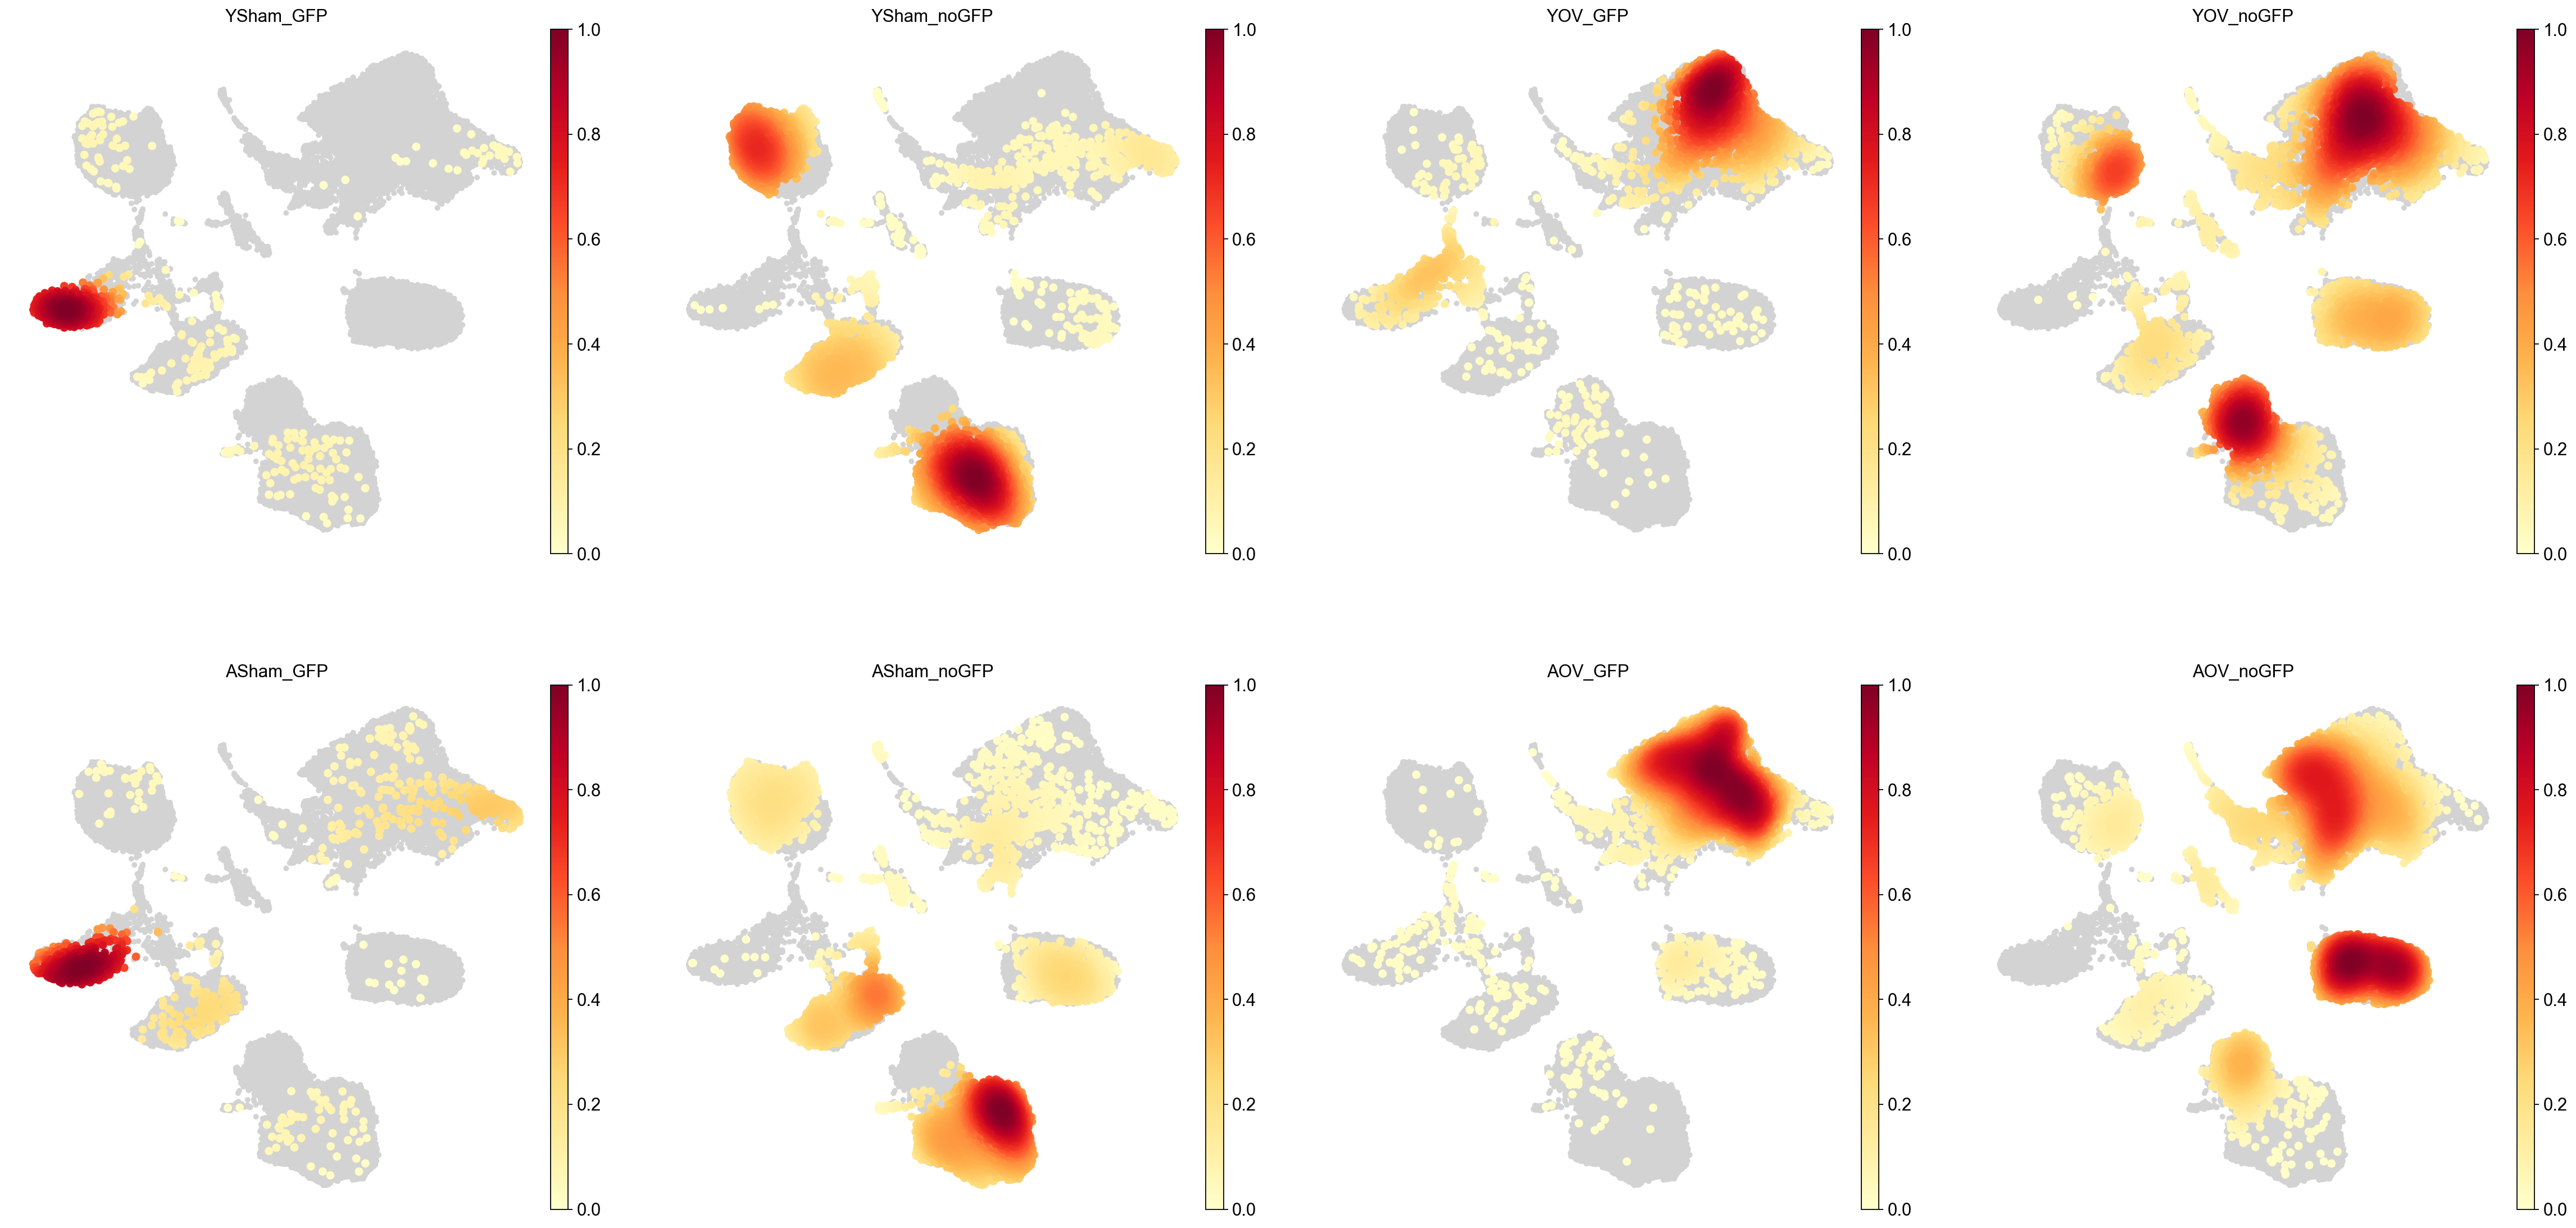

In [38]:
# Set figure size
pl.rcParams['figure.figsize'] = 8, 8
sc.pl.embedding_density(ad_filtered, groupby='Sample',ncols=4,frameon=False, save=f"umap_densityfilted_{img_tag}.png")

In [39]:
ad_filtered.obs[['umap_density_Sample','leiden','Sample']].to_csv('density_by_cluster_filteredbbbknn.csv')